# Data loading
This notebook contains examples on how to load data from photometry experiments
 - via the PhotometrySessionLoader for extracted data
 - manually from raw neurophotometrics files

In [2]:
from pathlib import Path
from iblphotometry import fpio
from brainbox.io.one import PhotometrySessionLoader
from one.api import ONE

## Data loading via the PhotometrySessionLoader

In [3]:
# ONE instantiation
one = ONE()

# an example eid
eid = 'a1ccc8ed-9829-4af8-91fd-cc1c83b74b98'

# Instantiating the PhotometrySessionLoader with both eid and one instance
psl = PhotometrySessionLoader(eid=eid, one=one)

# this will load both behavior and photometry data
psl.load_photometry()

In [4]:
# the trials table
psl.trials

,stimOnTrigger_times,quiescencePeriod,goCueTrigger_times,included,stimOffTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,intervals_0,intervals_1
0,5.631800,0.691136,5.731900,True,7.591700,7.650700,5.749400,6.591600,-1.0,5.834200,NaN,1.0000,6.591700,1.0,1.5,0.5,6.447995,0.000000,8.150701
1,16.067000,0.560657,16.111300,True,17.527500,17.583500,16.143700,16.527400,1.0,16.111200,0.000,NaN,16.527500,1.0,1.5,0.5,16.199995,8.847700,18.083502
2,19.198900,0.476476,19.244400,True,26.461800,26.510900,19.273100,25.461700,1.0,19.244300,0.125,NaN,25.461800,1.0,1.5,0.5,25.285995,18.722300,27.010902
3,28.113600,0.457060,28.166800,True,37.354700,37.427300,28.195200,36.354600,-1.0,28.166700,NaN,0.0000,36.354700,1.0,1.5,0.5,31.650995,27.656400,37.927302
4,39.739100,0.606345,39.816600,True,50.098900,50.165700,39.845600,49.098800,-1.0,39.816500,NaN,1.0000,49.098900,1.0,1.5,0.5,43.309995,38.527700,50.665702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,4689.949499,0.697823,4690.018699,False,4697.973699,4698.014699,4690.050599,4696.973599,-1.0,4690.018599,NaN,0.0625,4696.973699,1.0,1.5,0.2,4696.778995,4689.251499,4698.514700
439,4699.681799,0.539603,4699.735499,False,4707.726699,4707.801599,4699.764799,4706.726599,-1.0,4699.735399,NaN,1.0000,4706.726699,1.0,1.5,0.2,4705.961995,4699.141999,4708.301600
440,4709.562099,0.630427,4709.631399,False,4712.951299,4713.014199,4709.660999,4710.951199,1.0,4709.631299,NaN,0.1250,4710.982199,-1.0,0.0,0.2,4710.218995,4708.931499,4713.514201
441,4714.569099,0.436503,4714.634699,False,4719.516799,4719.584599,4714.663599,4717.516699,1.0,4714.634599,NaN,0.1250,4717.548999,-1.0,0.0,0.2,4716.861995,4714.132399,4720.084600


In [7]:
# the photometry data
psl.photometry


{'GCaMP':                    VTA       SNc
 times                           
 -4.984347     0.008611  0.004240
 -4.951003     0.008601  0.004225
 -4.917660     0.008591  0.004223
 -4.884349     0.008608  0.004227
 -4.851005     0.008591  0.004236
 ...                ...       ...
  4773.175119  0.005860  0.003958
  4773.208463  0.005871  0.003959
  4773.241806  0.005831  0.003951
  4773.275118  0.005813  0.003958
  4773.308461  0.005832  0.003957
 
 [143357 rows x 2 columns],
 'Isosbestic':                    VTA       SNc
 times                           
 -4.967675     0.009880  0.005846
 -4.934332     0.009897  0.005844
 -4.901020     0.009832  0.005857
 -4.867677     0.009853  0.005833
 -4.834333     0.009852  0.005834
 ...                ...       ...
  4773.191791  0.006518  0.004529
  4773.225134  0.006525  0.004528
  4773.258446  0.006540  0.004522
  4773.291789  0.006533  0.004516
  4773.325101  0.006528  0.004540
 
 [143357 rows x 2 columns]}

### Structure of the Photometry data
The photometry data is stored as a `dict`, with keys being the names of the sampled frequency bands (e.g. GCaMP, Isosbestic, TdTomato etc.), and the value for each key being a pandas dataframe with columns named after the brain region where the fiber was inserted.
Note that due to the nature of the time multiplexed photon collection, each frequency band is sampled at different times and hence has different time stamps. 

In [8]:
psl.photometry['GCaMP']

,VTA,SNc
times,,
-4.984347,0.008611,0.004240
-4.951003,0.008601,0.004225
-4.917660,0.008591,0.004223
-4.884349,0.008608,0.004227
-4.851005,0.008591,0.004236
...,...,...
4773.175119,0.005860,0.003958
4773.208463,0.005871,0.003959
4773.241806,0.005831,0.003951


<Axes: xlabel='times'>

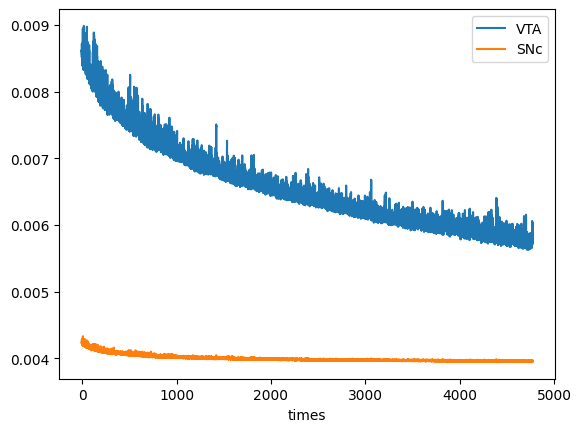

In [9]:
psl.photometry['GCaMP'].plot()

## Loading extracted data from disk
The use of the function `from_session_path` will load locally accessible data from disk without using ONE. 

In [15]:
session_path = Path('/home/georg/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04022/2022-12-30/001')
fpio.from_session_path(session_path)


{'GCaMP':                    VTA       SNc
 times                           
 -43.349004    0.009641  0.004446
 -43.315693    0.007813  0.003942
 -43.282350    0.007818  0.003944
 -43.249006    0.009597  0.004438
 -43.215695    0.009572  0.004450
 ...                ...       ...
  4783.774601  0.005953  0.003958
  4783.807944  0.005986  0.003964
  4783.841256  0.005977  0.003964
  4783.874599  0.005974  0.003958
  4783.907942  0.005999  0.003966
 
 [144826 rows x 2 columns],
 'Isosbestic':                    VTA       SNc
 times                           
 -43.332333    0.010875  0.006160
 -43.299021    0.009005  0.004903
 -43.265678    0.010851  0.006161
 -43.232335    0.010806  0.006146
 -43.199023    0.010804  0.006161
 ...                ...       ...
  4783.791273  0.006504  0.004525
  4783.824584  0.006501  0.004529
  4783.857927  0.006520  0.004540
  4783.891271  0.006514  0.004530
  4783.924582  0.006492  0.004531
 
 [144826 rows x 2 columns]}

## Data loading from raw neurophotometrics files on disk
The use of `from_neurophotometrics_file` bypasses ONE and the photometry sessions loader and reads the inputs directly from disk as they are stored after the experiemnt. This is useful to visually signal quality directly after the experiment, however the data lacks any synchronization with behavior and the mapping of insertion to brain region.

In [20]:
neurophotometrics_file = Path('/home/georg/data_local/_neurophotometrics_fpData.raw.pqt')
data = fpio.from_neurophotometrics_file(neurophotometrics_file)
data


{'Isosbestic':              Region0R  Region1G  Region2R  Region3G  Region4G
 times                                                        
 608.492896   0.003922  0.003922  0.003922  0.010875  0.006160
 608.526208   0.003922  0.003922  0.003922  0.009005  0.004903
 608.559552   0.003922  0.003922  0.003922  0.010851  0.006161
 608.592896   0.003922  0.003922  0.003922  0.010806  0.006146
 608.626208   0.003922  0.003922  0.003922  0.010804  0.006161
 ...               ...       ...       ...       ...       ...
 5435.706880  0.003922  0.003922  0.003922  0.006504  0.004525
 5435.740192  0.003922  0.003922  0.003922  0.006501  0.004529
 5435.773536  0.003922  0.003922  0.003922  0.006520  0.004540
 5435.806880  0.003922  0.003922  0.003922  0.006514  0.004530
 5435.840192  0.003922  0.003922  0.003922  0.006492  0.004531
 
 [144826 rows x 5 columns],
 'GCaMP':              Region0R  Region1G  Region2R  Region3G  Region4G
 times                                                        
 6

<Axes: xlabel='times'>

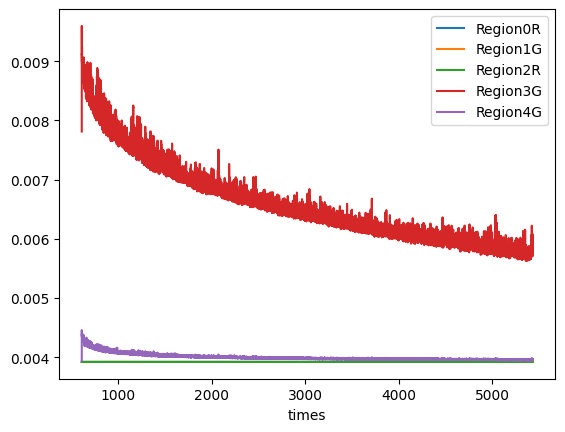

In [19]:
data['GCaMP'].plot()